In [9]:
import pandas as pd

# docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
# print(len(docs))
data_1 = pd.read_csv('./data_test/vnexpress-p1-12092023.csv')
baomoi = pd.read_csv('./data_test/baomoi12092023.csv')
data_2 = pd.read_csv('./data_test/data.csv')
data_3 = pd.read_csv('./data_test/2023-09-18-17-31-13_9GLZYsdwHJ_vnexpress.net.csv')
data_4 = pd.read_csv('./data_test/2023-09-19-11-27-57_zwqWUccPpj_vnexpress.net.csv')
data_5 = pd.read_csv('./data_test/2023-09-19-14-40-54_iQexLTB60F_vnexpress.net.csv')
data_6 = pd.read_csv('./data_test/2023-09-20-08-30-32_H9YXrXCqBa_vnexpress.net.csv')
data_7 = pd.read_csv('./data_test/2023-09-20-08-39-58_vo1ZegrY2g_vnexpress.net.csv')
data_8 = pd.read_csv('./data_test/2023-09-20-08-54-25_aWkfMKQDxi_vnexpress.net.csv')
papers = pd.concat([data_1, data_2,data_3,data_4,data_5,data_6,data_7,data_8, baomoi], ignore_index=True)

papers = papers.drop(columns=['description'], axis=1)
papers.rename(columns={'body': 'paper_text'}, inplace=True)
# convert type of column
papers['paper_text'].astype(str)
# Print head
print(papers.head())
print(papers.shape)

                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
3  Hai thanh niên đánh tài xế cướp tài sản - VnEx...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
3                                                NaN  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  
(681, 2)


In [10]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)
# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())

146
                                               title  \
0  Phi hành gia Mỹ lập kỷ lục ở lâu nhất trong vũ...   
1  'Ăn trong chánh niệm' giúp mẹ bỉm giảm 18 kg -...   
2  Truyền thông thế giới thán phục cơ thủ Bao Phư...   
4  Bán xe VinFast Fadil bản tiêu chuẩn 2021? - Vn...   
6  Camera ghi hình hai người cướp xe máy - VnExpress   

                                          paper_text  
0  Rubio sinh sống và làm việc trên Trạm Vũ trụ Q...  
1  Hoài Thanh hiện làm công việc kinh doanh tại K...  
2  Trang tin chuyên về billiards Kozoom giật tít:...  
4  Tối muốn bán xe VinFast Fadil bản tiêu chuẩn 2...  
6  Ngày 11/9, Huy cùng Lê Ngọc Tuấn (22 tuổi) bị ...  
<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       503 non-null    object
 1   paper_text  503 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB
None


In [11]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    rubio sinh sống và làm việc trên trạm vũ trụ q...
1    hoài thanh hiện làm công việc kinh doanh tại k...
2    trang tin chuyên về billiards kozoom giật tít:...
4    tối muốn bán xe vinfast fadil bản tiêu chuẩn 2...
6    ngày 11/9 huy cùng lê ngọc tuấn (22 tuổi) bị c...
Name: paper_text_processed, dtype: object

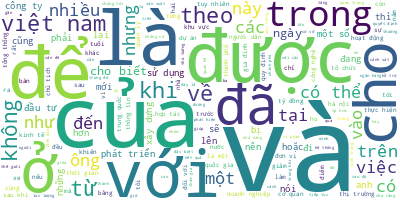

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [13]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # Sử dụng str.maketrans và translate để loại bỏ dấu câu
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    return ViTokenizer.tokenize(text) 

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(remove_punctuation_underscore(str(sentence)))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed'].apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
# text = data[0]
# print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Embedding

In [14]:
# from sentence_transformers import SentenceTransformer
# sentence_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

### Training model with bertopic
#### Parameters
##### BERTopic

- language: Ngôn ngữ, ở đây là vietnamese
- top_n_words: số lượng từ được sử dụng để mô tả mỗi chủ đề
- n_gram_range: số lượng từ trong một n-gram
- min_topic_size: số lượng tài liệu tối thiểu trong mỗi chủ đề
- nr_topics: số lượng topic cần phát hiện. Nếu không được chỉ định, BERTopic sẽ tìm kiếm tất cả các chủ đề có thể có. Nếu Bertopic tìm thấy 100 chủ đề mà nr_topics=10 thì nó sẽ cố gắng đưa về 10 chủ đề.
- low_memory: sử dụng low memory mode để sử dụng ít bộ nhớ hơn
- calculate_probabilities: tính xác suất của từng từ trong topic
##### UMAP: 
UMAP là một kỹ thuật tuyệt vời để giảm kích thước. Trong BERTopic, nó được sử dụng để giảm tính chiều của việc nhúng tài liệu vào thứ gì đó dễ sử dụng hơn với HDBSCAN để tạo các cụm tốt. Tuy nhiên, nó có một số lượng đáng kể các tham số mà bạn có thể tính đến. Vì việc hiển thị tất cả các tham số trong BERTopic sẽ khó quản lý nên chúng ta có thể khởi tạo mô hình UMAP của mình và chuyển nó sang BERTopic:
```md
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(docs)
```
- n_neighbors: 
- n_components: số chiều của embedding vector sau khi giảm chiều bằng UMAP
- metric: độ đo khoảng cách giữa các điểm dữ liệu trong không gian vector embedding (có thể là cosine, euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation, haversine, hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule, or matching)
- low_memory: low_memory được sử dụng khi tập dữ liệu có thể tiêu tốn nhiều bộ nhớ. Việc sử dụng hàng triệu tài liệu có thể dẫn đến các vấn đề về bộ nhớ và việc đặt giá trị này thành True có thể giảm bớt tiêu hao bộ nhớ.

##### HDBSCAN
Sau khi giảm số chiều của embedding vector, Chúng tôi sử dụng HDBSCAN để phân cụm các tập docs thành các cụm tài liệu tương tự nhau. Tương tự như UMAP, HDBSCAN có nhiều tham số để tuỳ chỉnh:
```md
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)
```
- min_cluster_size: số lượng tài liệu tối thiểu trong mỗi cụm
- min_samples: số lượng tài liệu tối thiểu trong mỗi cụm
- metric: được sử dụng để tính khoảng cách. Ở đây, chúng tôi đã sử dụng euclide vì sau khi giảm kích thước, chúng tôi có dữ liệu có chiều nhỏ và không cần tối ưu hóa nhiều. Tuy nhiên, nếu tăng n_comComponents trong UMAP thì nên xem xét các số liệu hoạt động với dữ liệu nhiều chiều.
- prediction_data: nếu True thì sẽ trả về các điểm dữ liệu được dự đoán cho mỗi cụm. Điều này có thể được sử dụng để phân tích các cụm và xác định các điểm nhiễu.


In [15]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics
)
topics, probs = topic_model.fit_transform(docs)

Batches: 100%|██████████| 16/16 [01:48<00:00,  6.76s/it]
2023-09-20 17:08:38,922 - BERTopic - Transformed documents to Embeddings
2023-09-20 17:08:41,518 - BERTopic - Reduced dimensionality
2023-09-20 17:08:41,594 - BERTopic - Clustered reduced embeddings
2023-09-20 17:08:57,779 - BERTopic - Reduced number of topics from 9 to 9


# VISUALIZE TOPIC MODEL

### Visualize Documents

In [17]:
from umap import UMAP
topic_model.visualize_documents(docs)

#### Custom Hover

In [19]:
# titles = [i for i in papers["title"]]
# topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings)

### Visualize Topic Hierarchy

In [20]:
# hierarchical: phân cấp
topic_model.visualize_hierarchy()

#### Text-based topic tree
- Mặc dù cấu trúc chung khó xem hơn nhưng chúng ta có thể thấy rõ hơn những chủ đề nào có thể được hợp nhất một cách hợp lý

In [21]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

100%|██████████| 7/7 [00:16<00:00,  2.30s/it]

.
├─■──bán_tháo_vpb_stb_đóng_cửa_rdp ── Topic: 3
└─việt_nam_hợp_tác_phát_triển_biden_nghiên_cứu
     ├─việt_nam_hợp_tác_phát_triển_biden_nghiên_cứu
     │    ├─■──nhiễm_trùng_triệu_chứng_viêm_virus_uốn_ván ── Topic: 2
     │    └─đổi_mới_việt_nam_hợp_tác_phát_triển_biden
     │         ├─đổi_mới_việt_nam_hợp_tác_phát_triển_biden
     │         │    ├─■──lớp_viết_cuộc_sống_căn_hộ_vợ_chồng ── Topic: 6
     │         │    └─đổi_mới_việt_nam_hợp_tác_phát_triển_toàn_diện
     │         │         ├─■──đổi_mới_việt_nam_hợp_tác_văn_hóa_phát_triển ── Topic: 7
     │         │         └─■──giam_ma_túy_lừa_đảo_chiếm_đoạt_tài_sản ── Topic: 4
     │         └─■──thông_báo_vô_lăng_kiểm_soát_điều_khiển_thông_tin ── Topic: 5
     └─phản_công_chiến_dịch_quốc_phòng_thành_tích_tấn_công
          ├─■──phản_công_ukraine_phòng_thủ_vladivostok_quốc_phòng ── Topic: 1
          └─■──giải_đấu_hạng_thi_đấu_sân_nhà_thành_tích ── Topic: 0



### Visualize Hierarchical Documents

In [ ]:
# hierarchical_topics = topic_model.hierarchical_topics(docs)

In [ ]:
# topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, embeddings=embeddings)

# # Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
# reduced_embeddings = UMAP(n_neighbors=10, n_components=10, min_dist=0.0, metric='cosine').fit_transform(embeddings)
# topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)

### Visualize Terms
- Chúng ta có thể trực quan hóa các từ được chọn cho một số chủ đề bằng cách tạo biểu đồ cột từ điểm c-TF-IDF cho mỗi biểu đồ đại diện chủ đề. Có thể thu thập thông tin từ các điểm c-TF-IDF tương đối giữa các chủ đề và bên trong chúng. Hơn nữa, bạn có thể dễ dàng so sánh các biểu đồ đại diện chủ đề với nhau. Để trực quan hóa cấu trúc này, hãy chạy đoạn mã sau:

In [ ]:
topic_model.visualize_barchart()

### Visualize Topic Similarity

In [ ]:
topic_model.visualize_heatmap()

### Visualize Term Score Decline

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.visualize_term_rank(log_scale=True)


### Visualize Topics per Class

In [ ]:
classes = [i for i in papers["title"]]
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

499it [00:05, 94.09it/s] 


### Visualize Probablities or Distribution

In [ ]:
topic_model.visualize_distribution(probs[0])

#### Visualize the token-level distributions
- Visualize: Hiển thị sự đóng góp của các từ trong một tài liệu với một chủ đề cụ thể hay nói cách khác là phân phối xác suất của các từ trong một chủ đề cụ thể với một bài viết. Để trực quan hóa phân phối này, hãy chạy đoạn mã sau:

In [ ]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


,hoài,hiện,công_việc,kinh_doanh,kiên,giang,cân,kg,thường_xuyên,mệt_mỏi,tự_ti,ngoại_hình,huấn_luyện_viên,dinh_dưỡng,phương_pháp,chánh,niệm,chế_độ,ăn_kiêng,trải,nghiệm,tiêu_thụ,thực_phẩm,niềm,vui,ăn_uống,nhai,chậm_rãi,cảm_nhận,kết_cấu,màu_sắc,hương_vị,thực_phẩm,bữa,đề_cao,thực_phẩm,sạch,an_toàn,lợi,sức_khỏe,sinh,rối_loạn,giấc_ngủ,bế,vội_vàng,tranh_thủ,ngủ,cân,ban_đầu,áp_dụng,chánh,niệm,cố_gắng,mức_độ,cơ_bản,đơn_giản,tức,không_gian,nhai,kỹ,phút,bữa,no,mẹ,quan_niệm,ăn_uống,thoải_mái,theo_đuổi,lâu_dài,ưu_tiên,thực_phẩm,nguồn_gốc,mùa,mua,chủ_yếu,thực_vật,đậu,hạt,hạch,cá,trứng,thịt,trắng,gà,vịt,hải_sản,bò,heo,dê,thịt,đỏ,chế_biến,kho,xào,om,đơn_thuần,hấp,luộc,phụ_nữ,áp_dụng,quy_tắc,tức,carbohydrates,trắng,tinh_bột,đơn_giản,chỉ_số,đường_huyết,gi,ví_dụ,gạo,trắng,bột,bánh,tiêu_thụ,sản_phẩm,đường,bánh,trà,sữa,nước_ngọt,ép,trái_cây,pha,đường,soda,bia,trái_cây,chỉ_số,đường_huyết,xoài,sầu_riêng,chôm_chôm,thơm,dứa,cạnh,mẹ,bỉm,ăn_theo,nguyên,tức,tiêu_thụ,bữa,bữa,tối_thiểu,tối,hôm,tiếng,trình,bữa,phụ,thực_phẩm,chủ_nhật,cheat,day,tức_thời_gian,thoải_mái,món,yêu,cân_bằng,tâm_lý,bữa,tập_thể_dục,phút,uống,ấm,thìa,bột,quế,hữu_cơ,lớp,tráng,dạ_dày,giúp,nạp,calo,phương_pháp,thoải_mái,môi_trường,áp_dụng,chánh,niệm,vui_vẻ,linh_hoạt,salad,đổi,rau,luộc,hôm,gạo,lứt,kịp,mua,gạo,trắng,nhai,kỹ,phương_pháp,bác_sĩ,huấn_luyện_viên,sức_khỏe,phan,thái,tân,sáng_lập,chương_trình,cân,homefit,huấn_luyện_viên,ăn_theo,chánh,niệm,nhắc,sách,chánh,niệm,sống,tỉnh,thức,thiền_sư,hạnh,ăn_uống,lơ_đễnh,nguyên_nhân,sâu_xa,sức_khỏe,béo,phì,bệnh,mãn_tính,chú_ý,thức_ăn,phục_vụ_việc,mùi_vị,thức_ăn,ăn_uống,phụ_thuộc,hình_ảnh,kích_thước,bát,đĩa,thiền_sư,viết,con_người,hiện_đại,rơi,biến_dạng,khẩu_phần,khả_năng,nhận_thức,thức_ăn,cơ_thể,hành_động,tưởng_chừng,đơn_giản,chậm,thưởng_thức,món,phương_thuốc,sức_khỏe,phát_sinh,lối,sống,công_nghiệp,thiền_sư,thực_hành,chánh,niệm,giúp,con_người,xao,nhãng,ăn_uống,vô_độ,cơ_thể,khỏe,cạnh,ăn_uống,tập_luyện,nguyên_tắc,vận_động,ở_cữ,đi_lại,giúp,tử_cung,co,hồi,khả_năng,đốt,mỡ,tái_tạo,năng_lượng,căng_thẳng,hướng_dẫn,phút,tập,động_tác,đơn_giản,air,squat,bài_tập,đứng,giúp,vận_động,trên_cơ_thể,đùi,mông,hông,wall,push,up,chống,tường,chống,đẩy,jumping,jack,nhảy,dang,hai,chân,dơ,hai,đầu,đập,bài_tập,giúp,cơ_thể,săn,chảy,xệ,cân,mẹ,bỉm,tận_dụng,ẵm,đứng,đứng,bế,bé,đi,vòng,đếm,phút,vận_động,sinh,kg,thực_hành,ăn_uống,chánh,niệm,kg,kg,kg,thân_hình,thon,gọn,số_đo,vòng,lối,sống,kết_hợp,chánh,niệm,quên,ăn_kiêng,cân,tinh_thần,cuộc_sống,thúy,quỳnh
2_bệnh_mắt_điều_trị_đau,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.107,0.107,0.107,0.107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.163,0.289,0.404,0.513,0.350,0.224,0.109,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [ ]:
topic_model.visualize_topics()


In [ ]:
topic_model.get_topic(1) 

[('nga', 0.13269237493069877),
 ('ukraine', 0.10838415192223953),
 ('tên_lửa', 0.04068817952417136),
 ('lực_lượng', 0.03420618944558525),
 ('tấn_công', 0.03317510037568866),
 ('quân_đội', 0.03288172144603813),
 ('triều_tiên', 0.03275405337059575),
 ('phản_công', 0.03171434565020687),
 ('putin', 0.028061554003190284),
 ('quân_sự', 0.0274077144361541)]

### Test

In [1]:
topics_over_time = topic_model.topics_over_time(tweets, timestamps, 
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)


NameError: name 'topic_model' is not defined